In [3]:
import sklearn.mixture as mix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def importData(filename):

	data = np.genfromtxt(filename,delimiter = ',')

	return data[:,np.newaxis]

In [101]:
filename = '/Users/Henry/OneDrive/PhD-Folder/GMM data/8mM.csv'

data = importData(filename)

data = np.log(data)

maxGaussians = 20

xtest = np.linspace(np.amin(data)-1,np.amax(data)+1,1000)
xtest = xtest[:,np.newaxis]

# 1000 rows and max gaussians columns
ytest = np.zeros((xtest.shape[0],maxGaussians))

means = []
sigs = []
w = []

for g in range(maxGaussians):

	GMM = mix.GaussianMixture(n_components = (g+1))

	GMM = GMM.fit(data)
	means.append(GMM.means_)
	sigs.append(np.power(GMM.covariances_,0.5))
	w.append(GMM.weights_)

	ytest[:,g] = np.exp(GMM.score_samples(xtest))

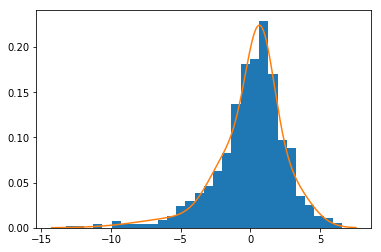

In [114]:
i = 3
counts, bins, ignored = plt.hist(data,30,density=True)
plt.plot(xtest,ytest[:,i])
plt.show
plt.savefig('/Users/Henry/OneDrive/PhD-Folder/GMM data/8mM_fig.png',bbox_inches='tight')

In [107]:
means2 = np.array(means[i]).flatten()
sigs2 = np.array(sigs[i]).flatten()
w2 = np.array(w[i]).flatten()


In [108]:

sdata = np.transpose([means2,sigs2,w2])

c = counts.flatten()
b = bins[:-1].flatten()
b = np.add(b,(b[1]-b[0])/2)
hdata = np.transpose([b,c])

c = xtest.flatten()
b = ytest[:,i]
d = b.flatten()

fdata =np.transpose([c,b])




In [109]:
np.savetxt('/Users/Henry/OneDrive/PhD-Folder/GMM data/8mM_fit.csv',fdata,delimiter=',')
np.savetxt('/Users/Henry/OneDrive/PhD-Folder/GMM data/8mM_param.csv',sdata,delimiter=',')
np.savetxt('/Users/Henry/OneDrive/PhD-Folder/GMM data/8mM_hist.csv',hdata,delimiter=',')